In [1]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()
X = dataset.data
y = dataset.target

In [2]:
print("{} {}".format(X.shape, y.shape))

(400, 4096) (400,)


In [3]:
import numpy as np
import time
np.random.seed(int(time.time()))
idx_random = np.random.randint(len(X), size=8)
print("{}".format(idx_random))

[112 196 162 240 106  57   8 211]


In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
fig.suptitle("Olivetti faces")
fig.tight_layout()
for p, i in enumerate(idx_random):
    plt.subplot(2, 4, p+1)
    plt.imshow(X[i, :].reshape((64, 64)), cmap='gray')
    plt.axis('off')
    plt.title("label {}".format(y[i]))

In [5]:
n_samples, n_features = X[:2]

In [6]:
print("samples {} features {}".format(n_samples, n_features))

samples [0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ] features [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]


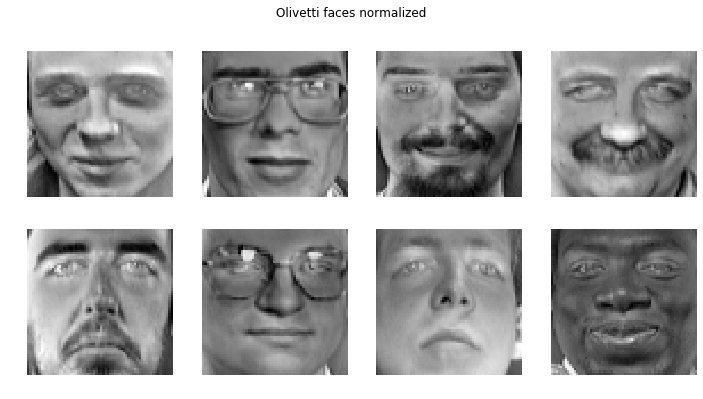

In [7]:
X -= X.mean(axis=0)

fig = plt.figure(figsize=(12,6))
fig.suptitle("Olivetti faces normalized")
fig.tight_layout()
for p, i in enumerate(idx_random):
    plt.subplot(2, 4, p+1)
    plt.imshow(X[i, :].reshape((64, 64)), cmap='gray')
    plt.axis('off')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=int(time.time()))
print("train {} {}, test {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

train (320, 4096) (320,), test (80, 4096) (80,)


In [9]:
import cv2
rtree = cv2.ml.RTrees_create()
n_trees = 100

eps = 0.01 
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, n_trees, eps)
rtree.setTermCriteria(criteria)

In [10]:
rtree.setMaxCategories( len(np.unique(y) ))
rtree.setMinSampleCount(2)
rtree.setMaxDepth(1000)
rtree.train(X_train, cv2.ml.ROW_SAMPLE, y_train)


True

In [11]:
print("Depth {}".format(rtree.getMaxDepth()))

Depth 25


In [12]:
r, y_hat = rtree.predict(X_test)

In [13]:
y_hat.T

array([[23., 11., 33., 14., 28., 37., 27., 31., 18., 26., 15.,  9.,  0.,
         1., 34., 27., 36., 38.,  6., 19., 28., 23., 29., 20.,  7., 22.,
        19., 26., 18., 19., 24., 23., 32., 18.,  9.,  0., 10., 21.,  2.,
         2., 33., 21., 27., 23., 21., 39., 20., 36., 33.,  5., 35., 21.,
        11., 19., 27., 35., 21., 17.,  8., 37.,  9., 22., 17., 29., 36.,
        38., 30., 23., 25., 12., 32., 22., 14.,  9., 31., 20., 21., 28.,
        38.,  1.]], dtype=float32)

In [14]:
y_test

array([23, 11, 33, 14, 28, 37, 27, 31, 18, 26, 15,  9,  0,  1, 34, 27, 36,
       38,  6, 19, 28, 23, 29, 20,  7, 22, 19, 26, 18, 19, 24, 23, 32, 18,
        9,  7, 10, 21,  2,  2, 33, 21, 27, 23, 21,  2, 20, 36, 33,  5, 35,
       21, 11, 19, 27, 35, 21, 17, 14, 37,  9, 22, 17, 29, 36, 38, 30, 23,
       25, 12, 32, 22, 14,  9, 31, 20, 21, 28, 38,  1])

In [15]:
from sklearn.metrics import accuracy_score
print("accuracy {} ".format(accuracy_score(y_test, y_hat)))

accuracy 0.9625 


In [16]:
X_test.shape

(80, 4096)

In [17]:
X_test[0].reshape((64,64))

array([[-0.25550628, -0.22349165, -0.19115692, ...,  0.04498962,
        -0.06036133, -0.08931825],
       [-0.24933895, -0.2178825 , -0.21052682, ...,  0.08758268,
        -0.00391537, -0.09331611],
       [-0.23091939, -0.20288214, -0.19768593, ...,  0.11710757,
         0.048585  , -0.06669411],
       ...,
       [-0.18022744, -0.18469027, -0.20266548, ..., -0.06478323,
        -0.05914262, -0.05065092],
       [-0.17626032, -0.19336784, -0.20685944, ..., -0.05861562,
        -0.06785139, -0.03636366],
       [-0.17864677, -0.2056299 , -0.20990686, ..., -0.08174594,
        -0.06571303, -0.04599184]], dtype=float32)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21, max_depth=25)
dtree.fit(X_train, y_train)
print("Single decision tree {}".format( dtree.score(X_test, y_test) ) )


Single decision tree 0.45


In [19]:
num_trees = 100
eps = 0.01 
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, num_trees, eps)
rtree.setTermCriteria(criteria)
rtree.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
_, y_hat = rtree.predict(X_test)
print("accuracy {}".format( accuracy_score(y_test, y_hat) ) )

accuracy 0.9625


In [20]:
import pandas as pd
data = pd.DataFrame(dataset.data)
data['target'] = dataset.target
data.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,-0.090217,-0.066467,-0.058926,-0.076333,-0.025919,0.018709,0.035599,0.030175,0.025269,0.009360,...,0.302200,0.289866,0.305651,0.135010,-0.206426,-0.187149,-0.168523,-0.152490,-0.153430,0
1,0.054411,0.036839,0.036116,0.039370,0.040196,0.051767,0.060392,0.054969,0.045930,0.025889,...,-0.210196,-0.226663,-0.206746,-0.187304,-0.185764,-0.183017,-0.168523,-0.160754,-0.157562,0
2,-0.081953,-0.033409,0.015455,0.010444,0.031932,0.068296,0.060392,0.038440,0.037665,0.021756,...,-0.234990,-0.181209,-0.219143,-0.212097,-0.189897,-0.191281,-0.180919,-0.164887,-0.157562,0
3,-0.201787,-0.240021,-0.282066,-0.324267,-0.364762,-0.398646,-0.377624,-0.242552,-0.181343,-0.160062,...,0.269143,0.293998,0.330444,0.387076,0.405145,0.428554,0.430651,0.438419,0.429215,0
4,0.099866,0.111219,0.106364,0.105485,0.093915,0.101354,0.072789,0.067366,0.058327,0.054814,...,-0.206064,-0.185341,-0.181953,-0.162510,-0.160971,-0.158223,-0.143729,-0.140093,-0.136901,0


In [21]:
dX, dy = data.iloc[:, :-1], data.iloc[:,-1]
print("{} {}".format(dX.shape, dy.shape))

(400, 4096) (400,)


In [22]:
dX_train, dX_test, dy_train, dy_test = train_test_split(dX, dy, random_state=784, test_size=0.2)
print("train {} {}, test {} {}".format(dX_train.shape, dy_train.shape, dX_test.shape, dy_test.shape))

train (320, 4096) (320,), test (80, 4096) (80,)


In [23]:
import xgboost as xgb
# xg_model = xgb.XGBClassifier()
xg_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=20, n_estimators=200)
xg_model.fit(dX_train, dy_train)
dy_test_preds = xg_model.predict(dX_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(dy_test, dy_test_preds))
print("RMSE {}".format(rmse))
from sklearn.metrics import accuracy_score
print("accuracy={:.7}".format( accuracy_score(dy_test, dy_test_preds) ) )

RMSE 7.6835864021952665
accuracy=0.7375


In [24]:
type(dy_test)

pandas.core.series.Series

In [25]:
type(dX_test)

pandas.core.frame.DataFrame

In [26]:
dy_test_preds

array([ 0, 16, 23, 32,  3, 29,  5, 36,  1, 18,  0,  0, 27, 18, 37, 15,  6,
       39, 32, 19, 19, 20,  7, 10, 14, 13, 28, 34, 20, 25,  2, 14, 28, 14,
       34, 16, 12,  2,  2, 22, 13, 34, 36,  7, 39, 18,  1, 29, 13, 36, 23,
        2, 13, 31,  0, 17, 16, 28, 25, 30,  6, 39, 23, 32, 38, 14, 18, 23,
       33, 29, 15,  5, 27,  9, 16, 31,  2,  2, 32,  8])

In [27]:
type(dy_test_preds)

numpy.ndarray

In [28]:
display(dy_test[:10])

0       0
223    22
231    23
329    32
34      3
82      8
51      5
364    36
257    25
183    18
Name: target, dtype: int64

In [29]:
display(dy_test_preds[:10])

array([ 0, 16, 23, 32,  3, 29,  5, 36,  1, 18])